In [12]:
%matplotlib inline

import warnings
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.random.seed(42)

## Clean Marketcap info

In [31]:
with pd.HDFStore('../../data/assets.h5') as store:
    stocks = store['us_equities/stocks']

In [32]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6834 entries, PIH to ZYME
Data columns (total 6 columns):
name         6834 non-null object
lastsale     6718 non-null float64
marketcap    5769 non-null object
ipoyear      3038 non-null float64
sector       5288 non-null object
industry     5288 non-null object
dtypes: float64(2), object(4)
memory usage: 373.7+ KB


In [33]:
stocks.head()

,name,lastsale,marketcap,ipoyear,sector,industry
ticker,,,,,,
PIH,"1347 Property Insurance Holdings, Inc.",7.2001,$43.09M,2014.0,Finance,Property-Casualty Insurers
PIHPP,"1347 Property Insurance Holdings, Inc.",25.6200,NaN,NaN,Finance,Property-Casualty Insurers
TURN,180 Degree Capital Corp.,2.2600,$70.33M,NaN,Finance,Finance/Investors Services
FLWS,"1-800 FLOWERS.COM, Inc.",12.9000,$833.39M,1999.0,Consumer Services,Other Specialty Stores
FCCY,1st Constitution Bancorp (NJ),21.3000,$178.14M,NaN,Finance,Savings Institutions


In [34]:
stocks = stocks[stocks.marketcap.notnull() & stocks.marketcap.str[-1].isin(['M', 'B'])]
stocks.marketcap = stocks.marketcap.str.replace('$', '')

In [35]:
stocks.marketcap.head()

ticker
PIH      43.09M
TURN     70.33M
FLWS    833.39M
FCCY    178.14M
SRCE      1.41B
Name: marketcap, dtype: object

In [36]:
for s, val in {'M': 1e6, 'B': 1e9}.items():
    stocks.loc[stocks.marketcap.str[-1] == s, 'marketcap'] = (stocks
                                                              .loc[stocks.marketcap.str[-1] == s, 'marketcap']
                                                              .str.replace(s, '')
                                                              .apply(pd.to_numeric)
                                                              .mul(val)
                                                              .astype(int))

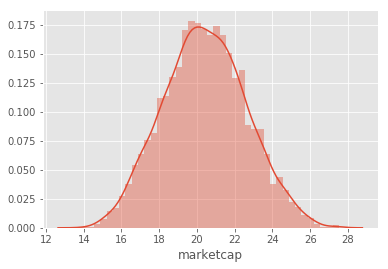

In [37]:
sns.distplot(np.log(stocks.marketcap));

In [38]:
marketcap = stocks['marketcap']

In [43]:
with pd.HDFStore('../../data/assets.h5') as store:
    stocks = store['us_equities/stocks'].assign(marketcap=marketcap)
    store.put('us_equities/stocks', stocks)